In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [79]:
data=pd.read_csv('Crop_recommendation.csv')
data

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN


In [80]:
data.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [81]:
#data.info()

In [82]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [83]:
data.drop(columns=['Unnamed: 8','Unnamed: 9'],inplace=True)

In [84]:
#data

In [85]:
data.shape

(2200, 8)

In [86]:
data.isnull().sum()


Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [87]:
data.duplicated().sum()

0

In [88]:
data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [89]:
data

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [90]:
#we use sklearn for feature encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [91]:
data['label'] = label.fit_transform(data['label'])
encoded_to_original=dict(zip(label.transform(label.classes_),
                            label.classes_))

for encoded_label,original_value in encoded_to_original.items():
    print(encoded_label,':',original_value)

0 : apple
1 : banana
2 : blackgram
3 : chickpea
4 : coconut
5 : coffee
6 : cotton
7 : grapes
8 : jute
9 : kidneybeans
10 : lentil
11 : maize
12 : mango
13 : mothbeans
14 : mungbean
15 : muskmelon
16 : orange
17 : papaya
18 : pigeonpeas
19 : pomegranate
20 : rice
21 : watermelon


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


In [36]:
corr=data.corr()
corr

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


<Axes: >

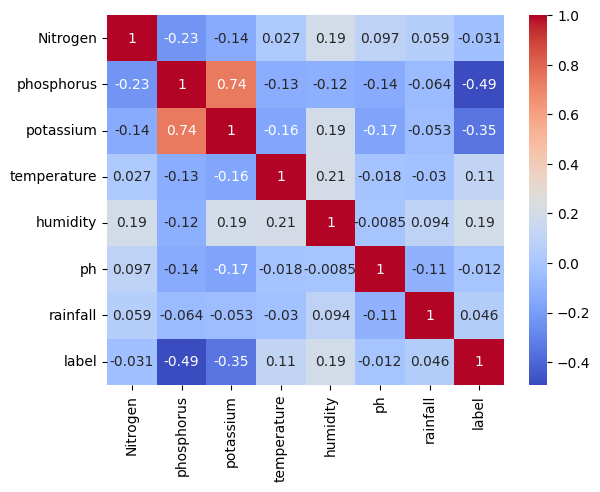

In [37]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [84]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

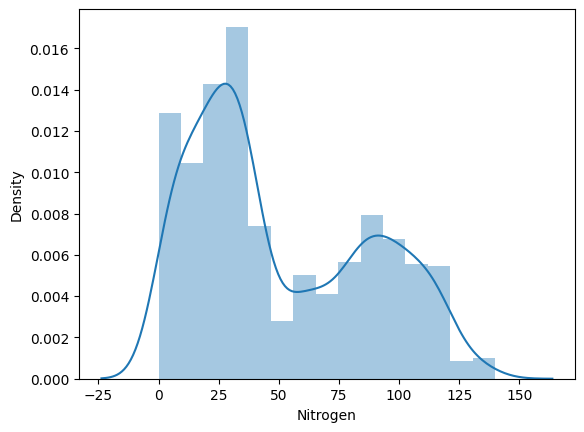

In [42]:
import matplotlib.pyplot as plt
sns.distplot(data['Nitrogen'])
plt.show()

In [93]:
#data.head()

In [95]:
X = data.drop(['label'],axis=1)
y = data['label']

In [96]:
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [98]:
y.shape

(2200,)

In [100]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train.shape

(1760, 7)

In [104]:
X_test.shape

(440, 7)

In [42]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [43]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [44]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

STANDARDIZATION

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [46]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models




models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [48]:

for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9568181818181818
Decision Tree  with accuracy : 0.9840909090909091
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9272727272727272


In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [50]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 


In [51]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")


Mungbean is a best crop to be cultivated 


In [52]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))